<a href="https://colab.research.google.com/github/AnassMamouni/AnassMamouni/blob/main/Probl%C3%A8me%20de%20classification%20binaire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# =========================
# 0. Imports et installation
# =========================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, confusion_matrix, classification_report,
                             roc_auc_score, roc_curve, auc)

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("/content/Titanic-Dataset.csv")

In [3]:
print("✅ Dataset chargé avec succès !")
print(f"\n📊 Dimensions : {df.shape}")

✅ Dataset chargé avec succès !

📊 Dimensions : (891, 12)


In [4]:
print("\n📋 Premières lignes :")
print(df.head())



📋 Premières lignes :
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.05

In [6]:
# 2. Exploration du dataset
# =========================
print("\n" + "="*60)
print("EXPLORATION DU DATASET")
print("="*60)
print("\nColonnes disponibles :")
print(df.columns.tolist())


EXPLORATION DU DATASET

Colonnes disponibles :
['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [7]:
print("\nInfos sur le dataset :")
print(df.info())


Infos sur le dataset :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [8]:
print("\nDescription statistique :")
print(df.describe())


Description statistique :
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [9]:
print("\nValeurs manquantes :")
print(df.isnull().sum())


Valeurs manquantes :
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [10]:
print("\nDistribution de la cible (Survived) :")
print(df['Survived'].value_counts())
print(df['Survived'].value_counts(normalize=True))


Distribution de la cible (Survived) :
Survived
0    549
1    342
Name: count, dtype: int64
Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64


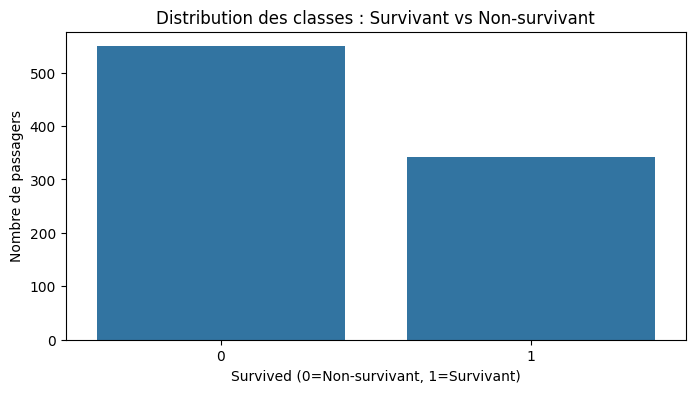

In [11]:
# Visualisation
plt.figure(figsize=(8, 4))
sns.countplot(x='Survived', data=df)
plt.title('Distribution des classes : Survivant vs Non-survivant', fontsize=12)
plt.xlabel('Survived (0=Non-survivant, 1=Survivant)')
plt.ylabel('Nombre de passagers')
plt.show()

In [12]:
# 3. Préparation des données
# =========================
print("\n" + "="*60)
print("PRÉPARATION DES DONNÉES")
print("="*60)

# Copie pour ne pas modifier l'original
df_clean = df.copy()


PRÉPARATION DES DONNÉES


In [13]:
# Supprimer les colonnes inutiles
columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin']
df_clean = df_clean.drop(columns=columns_to_drop)

In [14]:
# Gestion des valeurs manquantes
print("\nGestion des valeurs manquantes...")


Gestion des valeurs manquantes...


In [15]:
# Age : remplir avec la médiane
df_clean['Age'].fillna(df_clean['Age'].median(), inplace=True)

In [16]:
# Embarked : remplir avec le mode (valeur la plus fréquente)
df_clean['Embarked'].fillna(df_clean['Embarked'].mode()[0], inplace=True)

In [17]:
# Vérifier qu'il n'y a plus de NA
print(f"Valeurs manquantes après nettoyage :\n{df_clean.isnull().sum()}")

Valeurs manquantes après nettoyage :
Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [18]:
# Identifier les colonnes catégorielles
categorical_cols = df_clean.select_dtypes(include=['object']).columns.tolist()
print(f"\nColonnes catégorielles : {categorical_cols}")


Colonnes catégorielles : ['Sex', 'Embarked']


In [19]:
# One-Hot Encoding des variables catégorielles
print("\nEncodage des variables catégorielles...")
df_encoded = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=True)
print(f"✅ Nombre de colonnes après encodage : {df_encoded.shape[1]}")
print(df_encoded.head())


Encodage des variables catégorielles...
✅ Nombre de colonnes après encodage : 9
   Survived  Pclass   Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  \
0         0       3  22.0      1      0   7.2500      True       False   
1         1       1  38.0      1      0  71.2833     False       False   
2         1       3  26.0      0      0   7.9250     False       False   
3         1       1  35.0      1      0  53.1000     False       False   
4         0       3  35.0      0      0   8.0500      True       False   

   Embarked_S  
0        True  
1       False  
2        True  
3        True  
4        True  


In [20]:
# =========================
# 4. Séparation features / cible
# =========================
print("\n" + "="*60)
print("SÉPARATION FEATURES / CIBLE")
print("="*60)

X = df_encoded.drop(columns=['Survived'])
y = df_encoded['Survived']

print(f"\nX (features) : {X.shape}")
print(f"y (cible)    : {y.shape}")
print(f"\nNoms des features :")
print(X.columns.tolist())


SÉPARATION FEATURES / CIBLE

X (features) : (891, 8)
y (cible)    : (891,)

Noms des features :
['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']


In [21]:
# 5. Division train / test
# =========================
print("\n" + "="*60)
print("DIVISION TRAIN / TEST (80% / 20%)")
print("="*60)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nX_train : {X_train.shape}")
print(f"X_test  : {X_test.shape}")
print(f"y_train : {y_train.shape}")
print(f"y_test  : {y_test.shape}")


DIVISION TRAIN / TEST (80% / 20%)

X_train : (712, 8)
X_test  : (179, 8)
y_train : (712,)
y_test  : (179,)


In [22]:
# Vérifier l'équilibre des classes
print(f"\nDistribution classes dans train set :")
print(y_train.value_counts(normalize=True))


Distribution classes dans train set :
Survived
0    0.616573
1    0.383427
Name: proportion, dtype: float64


In [23]:
# 6. Modèle 1 : Régression Logistique
# =========================
print("\n" + "="*60)
print("MODÈLE 1 : RÉGRESSION LOGISTIQUE")
print("="*60)

model_lr = LogisticRegression(random_state=42)
model_lr.fit(X_train, y_train)

y_pred_lr = model_lr.predict(X_test)
y_proba_lr = model_lr.predict_proba(X_test)[:, 1]

print("✅ Modèle entraîné !")


MODÈLE 1 : RÉGRESSION LOGISTIQUE
✅ Modèle entraîné !


In [24]:
# =========================
# 7. Modèle 2 : Arbre de Décision
# =========================
print("\n" + "="*60)
print("MODÈLE 2 : ARBRE DE DÉCISION")
print("="*60)

model_dt = DecisionTreeClassifier(random_state=42, max_depth=5)
model_dt.fit(X_train, y_train)

y_pred_dt = model_dt.predict(X_test)
y_proba_dt = model_dt.predict_proba(X_test)[:, 1]

print("✅ Modèle entraîné !")


MODÈLE 2 : ARBRE DE DÉCISION
✅ Modèle entraîné !


In [25]:
# 8. Évaluation des modèles
# =========================
print("\n" + "="*60)
print("ÉVALUATION DES MODÈLES")
print("="*60)

def evaluate_model(model_name, y_true, y_pred, y_proba):
    """Fonction pour évaluer un modèle"""
    print(f"\n📊 MODÈLE : {model_name}")
    print("-" * 50)

    # Métriques
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc_score = roc_auc_score(y_true, y_proba)

    print(f"Accuracy  (Précision globale) : {accuracy:.4f}")
    print(f"Precision (Parmi les prédits 1) : {precision:.4f}")
    print(f"Recall    (Vrais positifs) : {recall:.4f}")
    print(f"F1-Score  (Moyenne harmonique) : {f1:.4f}")
    print(f"ROC-AUC   (Aire sous la courbe) : {auc_score:.4f}")

    return accuracy, precision, recall, f1, auc_score


ÉVALUATION DES MODÈLES


In [26]:
# Évaluation Régression Logistique
acc_lr, prec_lr, rec_lr, f1_lr, auc_lr = evaluate_model(
    "Régression Logistique", y_test, y_pred_lr, y_proba_lr
)


📊 MODÈLE : Régression Logistique
--------------------------------------------------
Accuracy  (Précision globale) : 0.8101
Precision (Parmi les prédits 1) : 0.7966
Recall    (Vrais positifs) : 0.6812
F1-Score  (Moyenne harmonique) : 0.7344
ROC-AUC   (Aire sous la courbe) : 0.8402


In [27]:
# Évaluation Arbre de Décision
acc_dt, prec_dt, rec_dt, f1_dt, auc_dt = evaluate_model(
    "Arbre de Décision", y_test, y_pred_dt, y_proba_dt
)


📊 MODÈLE : Arbre de Décision
--------------------------------------------------
Accuracy  (Précision globale) : 0.7654
Precision (Parmi les prédits 1) : 0.7547
Recall    (Vrais positifs) : 0.5797
F1-Score  (Moyenne harmonique) : 0.6557
ROC-AUC   (Aire sous la courbe) : 0.7971



MATRICES DE CONFUSION


Text(145.72222222222223, 0.5, 'Réalité')

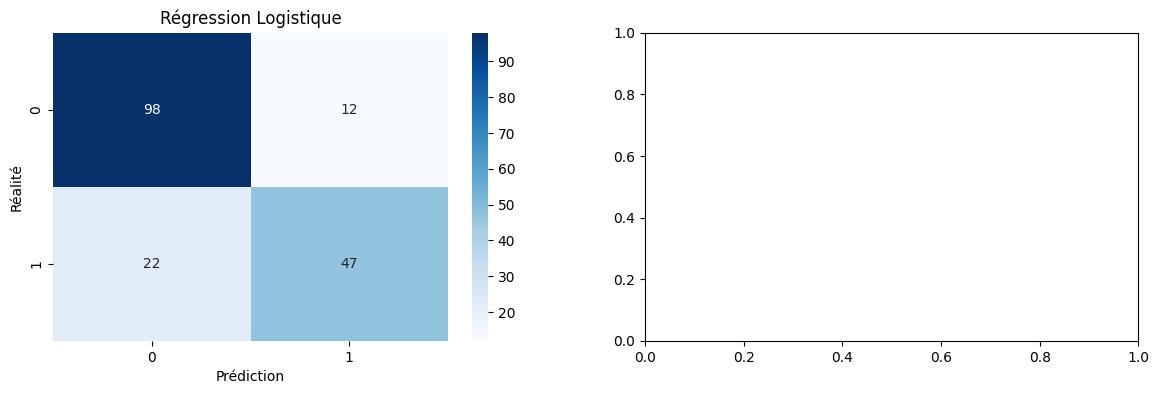

In [28]:
# 9. Matrices de confusion
# =========================
print("\n" + "="*60)
print("MATRICES DE CONFUSION")
print("="*60)

fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# Matrice 1 : Régression Logistique
cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Régression Logistique', fontsize=12)
axes[0].set_xlabel('Prédiction')
axes[0].set_ylabel('Réalité')

In [29]:
# Matrice 2 : Arbre de Décision
cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title('Arbre de Décision', fontsize=12)
axes[1].set_xlabel('Prédiction')
axes[1].set_ylabel('Réalité')

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [30]:
# 10. Rapport de classification
# =========================
print("\n" + "="*60)
print("RAPPORTS DE CLASSIFICATION DÉTAILLÉS")
print("="*60)

print("\n📋 Régression Logistique :")
print(classification_report(y_test, y_pred_lr,
                          target_names=['Non-survivant', 'Survivant']))

print("\n📋 Arbre de Décision :")
print(classification_report(y_test, y_pred_dt,
                          target_names=['Non-survivant', 'Survivant']))


RAPPORTS DE CLASSIFICATION DÉTAILLÉS

📋 Régression Logistique :
               precision    recall  f1-score   support

Non-survivant       0.82      0.89      0.85       110
    Survivant       0.80      0.68      0.73        69

     accuracy                           0.81       179
    macro avg       0.81      0.79      0.79       179
 weighted avg       0.81      0.81      0.81       179


📋 Arbre de Décision :
               precision    recall  f1-score   support

Non-survivant       0.77      0.88      0.82       110
    Survivant       0.75      0.58      0.66        69

     accuracy                           0.77       179
    macro avg       0.76      0.73      0.74       179
 weighted avg       0.76      0.77      0.76       179




COURBES ROC (Receiver Operating Characteristic)


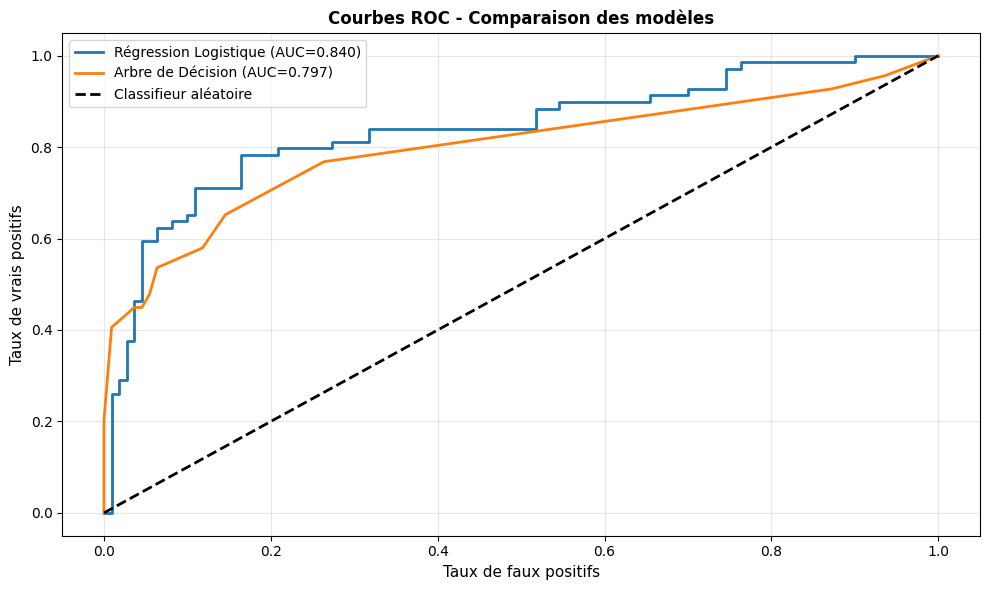

In [31]:
# 11. Courbes ROC
# =========================
print("\n" + "="*60)
print("COURBES ROC (Receiver Operating Characteristic)")
print("="*60)

plt.figure(figsize=(10, 6))

# ROC Régression Logistique
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
plt.plot(fpr_lr, tpr_lr, label=f'Régression Logistique (AUC={auc_lr:.3f})', linewidth=2)

# ROC Arbre de Décision
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_proba_dt)
plt.plot(fpr_dt, tpr_dt, label=f'Arbre de Décision (AUC={auc_dt:.3f})', linewidth=2)

# Ligne de référence (classifieur aléatoire)
plt.plot([0, 1], [0, 1], 'k--', label='Classifieur aléatoire', linewidth=2)

plt.xlabel('Taux de faux positifs', fontsize=11)
plt.ylabel('Taux de vrais positifs', fontsize=11)
plt.title('Courbes ROC - Comparaison des modèles', fontsize=12, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


COMPARAISON DES MODÈLES

 Métrique  Régression Logistique  Arbre de Décision
 Accuracy               0.810056           0.765363
Precision               0.796610           0.754717
   Recall               0.681159           0.579710
 F1-Score               0.734375           0.655738
  ROC-AUC               0.840184           0.797101


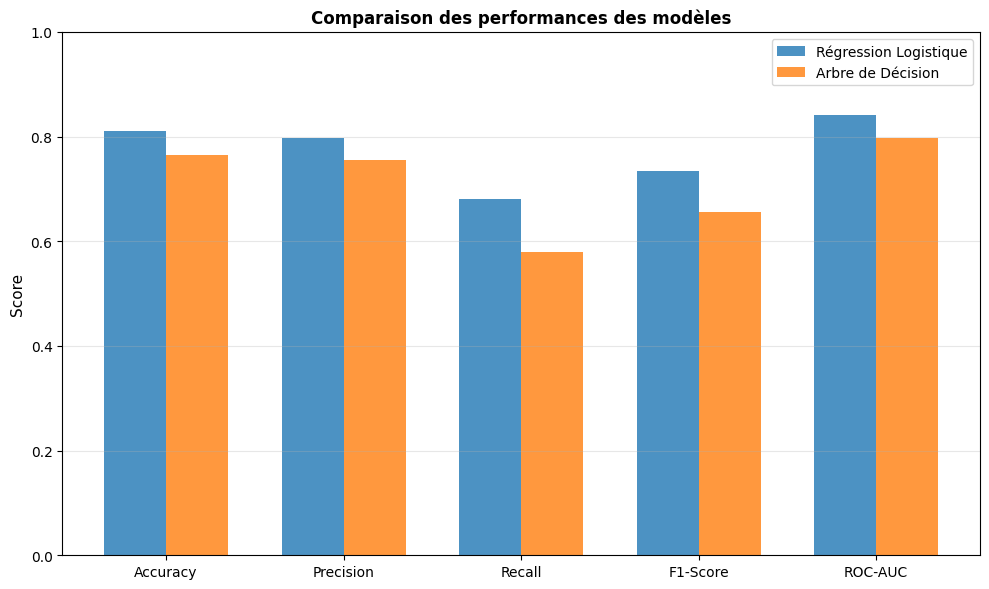

In [32]:
 #=========================
# 12. Comparaison des modèles
# =========================
print("\n" + "="*60)
print("COMPARAISON DES MODÈLES")
print("="*60)

comparison_df = pd.DataFrame({
    'Métrique': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC'],
    'Régression Logistique': [acc_lr, prec_lr, rec_lr, f1_lr, auc_lr],
    'Arbre de Décision': [acc_dt, prec_dt, rec_dt, f1_dt, auc_dt]
})

print("\n" + comparison_df.to_string(index=False))

# Visualisation
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(comparison_df))
width = 0.35

ax.bar(x - width/2, comparison_df['Régression Logistique'], width,
       label='Régression Logistique', alpha=0.8)
ax.bar(x + width/2, comparison_df['Arbre de Décision'], width,
       label='Arbre de Décision', alpha=0.8)

ax.set_ylabel('Score', fontsize=11)
ax.set_title('Comparaison des performances des modèles', fontsize=12, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(comparison_df['Métrique'])
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3, axis='y')
ax.set_ylim([0, 1])

plt.tight_layout()
plt.show()

In [33]:
# =========================
# 13. Meilleur modèle et interprétation
# =========================
print("\n" + "="*60)
print("INTERPRÉTATION ET CONCLUSION")
print("="*60)

best_model = "Régression Logistique" if auc_lr > auc_dt else "Arbre de Décision"
print(f"\n🏆 Meilleur modèle : {best_model}")

print("\n💡 Analyse :")
print(f"""
1. **Quel modèle est le plus adapté ?**
   - Régression Logistique : AUC = {auc_lr:.4f}
   - Arbre de Décision : AUC = {auc_dt:.4f}
   → Le modèle avec l'AUC le plus élevé est le meilleur

2. **Problèmes de classes déséquilibrées ?**
   - Non-survivants : {(y_test == 0).sum()} cas
   - Survivants : {(y_test == 1).sum()} cas
   - Les classes sont relativement équilibrées

3. **Observations sur les matrices de confusion :**
   - Vrais positifs (TP) : survivants correctement prédits
   - Faux positifs (FP) : non-survivants prédits comme survivants
   - Vrais négatifs (TN) : non-survivants correctement prédits
   - Faux négatifs (FN) : survivants prédits comme non-survivants
""")

print(f"\n✅ RÉSUMÉ")
print(f"Le modèle {best_model} obtient une performance de {max(auc_lr, auc_dt):.2%} sur la métrique AUC.")


INTERPRÉTATION ET CONCLUSION

🏆 Meilleur modèle : Régression Logistique

💡 Analyse :

1. **Quel modèle est le plus adapté ?**
   - Régression Logistique : AUC = 0.8402
   - Arbre de Décision : AUC = 0.7971
   → Le modèle avec l'AUC le plus élevé est le meilleur

2. **Problèmes de classes déséquilibrées ?**
   - Non-survivants : 110 cas
   - Survivants : 69 cas
   - Les classes sont relativement équilibrées

3. **Observations sur les matrices de confusion :**
   - Vrais positifs (TP) : survivants correctement prédits
   - Faux positifs (FP) : non-survivants prédits comme survivants
   - Vrais négatifs (TN) : non-survivants correctement prédits
   - Faux négatifs (FN) : survivants prédits comme non-survivants


✅ RÉSUMÉ
Le modèle Régression Logistique obtient une performance de 84.02% sur la métrique AUC.


In [34]:

# =========================
# 14. Exemples de prédictions
# =========================
print("\n" + "="*60)
print("EXEMPLES DE PRÉDICTIONS (Régression Logistique)")
print("="*60)

results_df = pd.DataFrame({
    'Réalité': y_test.values[:10],
    'Prédiction': y_pred_lr[:10],
    'Probabilité_Survivant': np.round(y_proba_lr[:10], 3),
    'Correct': (y_test.values[:10] == y_pred_lr[:10])
})

print("\n" + results_df.to_string(index=False))

print("\n" + "="*60)
print("✅ PROJET TERMINÉ !")
print("="*60)


EXEMPLES DE PRÉDICTIONS (Régression Logistique)

 Réalité  Prédiction  Probabilité_Survivant  Correct
       0           0                  0.071     True
       0           0                  0.049     True
       1           0                  0.149    False
       0           0                  0.037     True
       1           1                  0.714     True
       1           0                  0.431    False
       1           1                  0.741     True
       0           0                  0.331     True
       0           0                  0.340     True
       0           0                  0.165     True

✅ PROJET TERMINÉ !
